## Introduction

One hot encoding if we want to keep it

In [2]:
from sklearn.preprocessing import LabelBinarizer

# df_HCC = df_HCC2.rename(columns={'PCR Plate': 'Lane'})
# #One-Hot-Encoding
# encoder = LabelBinarizer()
# for d in [df_MC, df_HCC]:
#     condition = d["Condition"]
#     condition_1hot = encoder.fit_transform(condition)
#     lane = d["Lane"]
#     lane_1hot = encoder.fit_transform(lane)
#     pos = d["Pos"]
#     pos_1hot = encoder.fit_transform(pos)
#     #Changing the columns with the one hot encoding
#     d["Condition"] = condition_1hot
#     d["Lane"] = lane_1hot.tolist()
#     d["Pos"] = pos_1hot.tolist()

## Imports

In [3]:
import sys
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt             #visualisation
import seaborn as sns   #visualisation
%matplotlib inline     
sns.set(color_codes=True)

## Exploratory Data Analysis TSV

In [4]:
filepath_HCC = "raw_data/HCC1806_SmartS_MetaData.tsv"
filepath_MCF = "raw_data/MCF7_SmartS_MetaData.tsv"
df_meta_HCC = pd.read_csv(filepath_HCC,delimiter="\t",engine='python',index_col=0)
df_meta_MCF = pd.read_csv(filepath_MCF,delimiter="\t",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(df_meta_HCC))
print("Dataframe dimensions:", np.shape(df_meta_MCF))

Dataframe dimensions: (243, 8)
Dataframe dimensions: (383, 8)


In [5]:
print("First column: ", df_meta_HCC.iloc[ : , 0])

First column:  Filename
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam    HCC1806
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam     HCC1806
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam       HCC1806
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam      HCC1806
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam        HCC1806
                                                                         ...   
output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam    HCC1806
output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam    HCC1806
output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam      HCC1806
output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam     HCC1806
output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam     HCC1806
Name: Cell Line, Length: 243, dtype: object


## EDA TXT

In [6]:
#HCC cell line
df_HCC_s_f = pd.read_csv("raw_data/HCC1806_SmartS_Filtered_Data.txt", delimiter="\ ",engine='python',index_col=0)
df_HCC_s_f_n_test = pd.read_csv("raw_data/HCC1806_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt", delimiter="\ ",engine='python',index_col=0)
df_HCC_s_f_n_train = pd.read_csv("raw_data/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt", delimiter="\ ",engine='python',index_col=0)
df_HCC_s_uf = pd.read_csv("raw_data/HCC1806_SmartS_Unfiltered_Data.txt", delimiter="\ ",engine='python',index_col=0)

#MCF cell line
df_MCF_s_f = pd.read_csv("raw_data/MCF7_SmartS_Filtered_Data.txt", delimiter="\ ",engine='python',index_col=0)
df_MCF_s_f_n_test = pd.read_csv("raw_data/MCF7_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt", delimiter="\ ",engine='python',index_col=0)
df_MCF_s_f_n_train = pd.read_csv("raw_data/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt", delimiter="\ ",engine='python',index_col=0)
df_MCF_s_uf = pd.read_csv("raw_data/MCF7_SmartS_Unfiltered_Data.txt", delimiter="\ ",engine='python',index_col=0)


#List of datasets
txt_files = [df_MCF_s_uf, df_HCC_s_uf]
tsv_files = [df_meta_MCF, df_meta_HCC]

In [7]:
def desc(df):
    print(df.shape)
    print(list(df.columns))
    

# MCF
Some intial comments on the the rows and column

In [8]:
desc(df_meta_MCF)
df_meta_MCF.describe()

(383, 8)
['Cell Line', 'Lane', 'Pos', 'Condition', 'Hours', 'Cell name', 'PreprocessingTag', 'ProcessingComments']


Hours
count  383.0
mean    72.0
std      0.0
min     72.0
25%     72.0
50%     72.0
75%     72.0
max     72.0

In [9]:
desc(df_meta_HCC)
df_meta_HCC.describe()

(243, 8)
['Cell Line', 'PCR Plate', 'Pos', 'Condition', 'Hours', 'Cell name', 'PreprocessingTag', 'ProcessingComments']


PCR Plate  Hours
count  243.000000  243.0
mean     2.411523   24.0
std      1.081107    0.0
min      1.000000   24.0
25%      1.000000   24.0
50%      2.000000   24.0
75%      3.000000   24.0
max      4.000000   24.0

# TXT files

Structure and content of each data file

thia dataframe uses symbols to identify genes(identifiers)


In [10]:
desc(df_MCF_s_uf)
df_MCF_s_uf.describe()

(22934, 383)
['"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"', '"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"', '"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"', '"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"', '"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"', '"output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam"', '"output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam"', '"output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam"', '"output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam"', '"output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam"', '"output.STAR.1_A8_Hypo_S26_Aligned.sortedByCoord.out.bam"', '"output.STAR.1_A9_Hypo_S27_Aligned.sortedByCoord.out.bam"', '"output.STAR.1_B10_Hypo_S76_Aligned.sortedByCoord.out.bam"', '"output.STAR.1_B11_Hypo_S77_Aligned.sortedByCoord.out.bam"', '"output.STAR.1_B12_Hypo_S78_Aligned.sortedByCoord.out.bam"', '"output.STAR.1_B1_Norm_S49_Aligned.sortedByCoord.out.bam"', '"output.S

"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"  \
count                                       22934.000000            
mean                                           40.817651            
std                                           465.709940            
min                                             0.000000            
25%                                             0.000000            
50%                                             0.000000            
75%                                            17.000000            
max                                         46744.000000            

       "output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"  \
count                                       22934.000000            
mean                                            0.012253            
std                                             0.207726            
min                                             0.000000            
25%                                             0.000000            
50%                                             0.000000            
75%                                             0.000000            
max                                            14.000000            

       "output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"  \
count                                       22934.000000            
mean                                           86.442400            
std                                          1036.572689            
min                                             0.000000            
25%                                             0.000000            
50%                                             0.000000            
75%                                             5.000000            
max                                         82047.000000            

       "output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"  \
count                                       22934.000000          
mean                                            1.024636          
std                                             6.097362          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                             0.000000          
max                                           289.000000          

       "output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"  \
count                                       22934.000000          
mean                                           14.531351          
std                                           123.800530          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                             7.000000          
max                                         10582.000000          

       "output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam"  \
count                                       22934.000000          
mean                                           56.213613          
std                                           503.599145          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                            23.000000          
max                                         46856.000000          

       "output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam"  \
count                                       22934.000000          
mean                                           75.397183          
std                                           430.471519          
min                                             0.000000     

In [11]:
desc(df_HCC_s_uf)
df_HCC_s_uf.describe()

(23396, 243)
['"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"', '"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"', '"output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"', '"output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"', '"output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"', '"output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam"', '"output.STAR.PCRPlate1A5_Hypoxia_S108_Aligned.sortedByCoord.out.bam"', '"output.STAR.PCRPlate1A6_Hypoxia_S11_Aligned.sortedByCoord.out.bam"', '"output.STAR.PCRPlate1A7_Normoxia_S113_Aligned.sortedByCoord.out.bam"', '"output.STAR.PCRPlate1A8_Normoxia_S119_Aligned.sortedByCoord.out.bam"', '"output.STAR.PCRPlate1A9_Normoxia_S20_Aligned.sortedByCoord.out.bam"', '"output.STAR.PCRPlate1B11_Normoxia_S127_Aligned.sortedByCoord.out.bam"', '"output.STAR.PCRPlate1B12_Normoxia_S27_Aligned.sortedByCoord.out.bam"', '"output.STAR.PCRPlate1B1_Hypoxia_S98_Aligned.so

"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"  \
count                                       23396.000000                        
mean                                           99.565695                        
std                                           529.532443                        
min                                             0.000000                        
25%                                             0.000000                        
50%                                             0.000000                        
75%                                            51.000000                        
max                                         35477.000000                        

       "output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"  \
count                                       23396.000000                       
mean                                          207.678278                       
std                                           981.107905                       
min                                             0.000000                       
25%                                             0.000000                       
50%                                             0.000000                       
75%                                           125.000000                       
max                                         69068.000000                       

       "output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"  \
count                                       23396.000000                     
mean                                            9.694734                     
std                                            65.546050                     
min                                             0.000000                     
25%                                             0.000000                     
50%                                             0.000000                     
75%                                             5.000000                     
max                                          6351.000000                     

       "output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"  \
count                                       23396.000000                      
mean                                          150.689007                      
std                                           976.936548                      
min                                             0.000000                      
25%                                             0.000000                      
50%                                             0.000000                      
75%                                            40.000000                      
max                                         70206.000000                      

       "output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"  \
count                                       23396.000000                    
mean                                           35.700504                    
std                                           205.885369                    
min                                             0.000000                    
25%                                             0.000000                    
50%                                             0.000000                    
75%                                            22.000000                    
max                                         17326.000000                    

       "output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam"  \
count                                       23396.000000                    
mean                                           47.088434                    
std                                           545.367706                    
min                                             0.000000                    
25%                                             0.000000      

In [12]:
gene_codes_MCF = df_MCF_s_uf.index
gene_codes_HCC = df_HCC_s_uf.index
print(gene_codes_HCC)
print(gene_codes_MCF)

Index(['"WASH7P"', '"CICP27"', '"DDX11L17"', '"WASH9P"', '"OR4F29"',
       '"MTND1P23"', '"MTND2P28"', '"MTCO1P12"', '"MTCO2P12"', '"MTATP8P1"',
       ...
       '"MT-TH"', '"MT-TS2"', '"MT-TL2"', '"MT-ND5"', '"MT-ND6"', '"MT-TE"',
       '"MT-CYB"', '"MT-TT"', '"MT-TP"', '"MAFIP"'],
      dtype='object', length=23396)
Index(['"WASH7P"', '"MIR6859-1"', '"WASH9P"', '"OR4F29"', '"MTND1P23"',
       '"MTND2P28"', '"MTCO1P12"', '"MTCO2P12"', '"MTATP8P1"', '"MTATP6P1"',
       ...
       '"MT-TH"', '"MT-TS2"', '"MT-TL2"', '"MT-ND5"', '"MT-ND6"', '"MT-TE"',
       '"MT-CYB"', '"MT-TT"', '"MT-TP"', '"MAFIP"'],
      dtype='object', length=22934)


In [13]:
def graphs(df):
    pass

In [14]:
#Missing Values
def missing(df):
    miss = False
    for c in df.columns:
        if df[c].isnull().sum() != 0:
            print(df[c].isnull().sum())
            miss = True
    if not miss:
        print("No missing values")

for df in txt_files:
    missing(df)


No missing values
No missing values


In [15]:
#Function to crate the violin plots
cnames_MCF = list(df_MCF_s_uf.columns)
cnames_HCC = list(df_HCC_s_uf.columns)
def violin(df):
    cnames = list(df.columns)
    cnames[1]
    sns.boxplot(x=df[cnames[1]])
    sns.violinplot(x=df[cnames[1]])
    


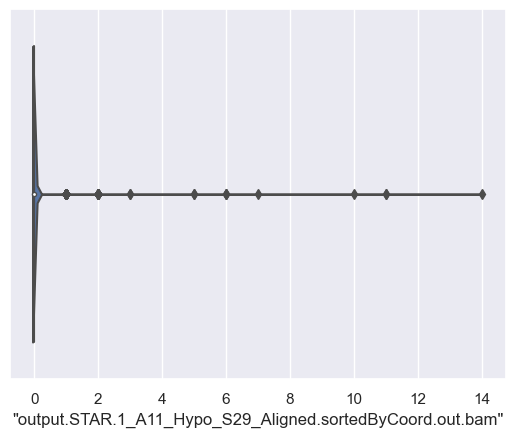

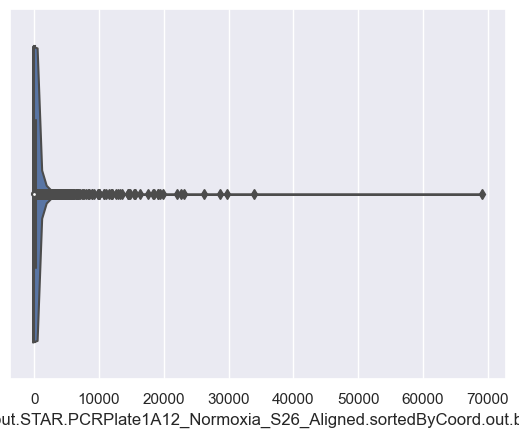

In [16]:
#Violin plots for the txt unfiltered datasets
for df in txt_files:
    violin(df)
    plt.show()


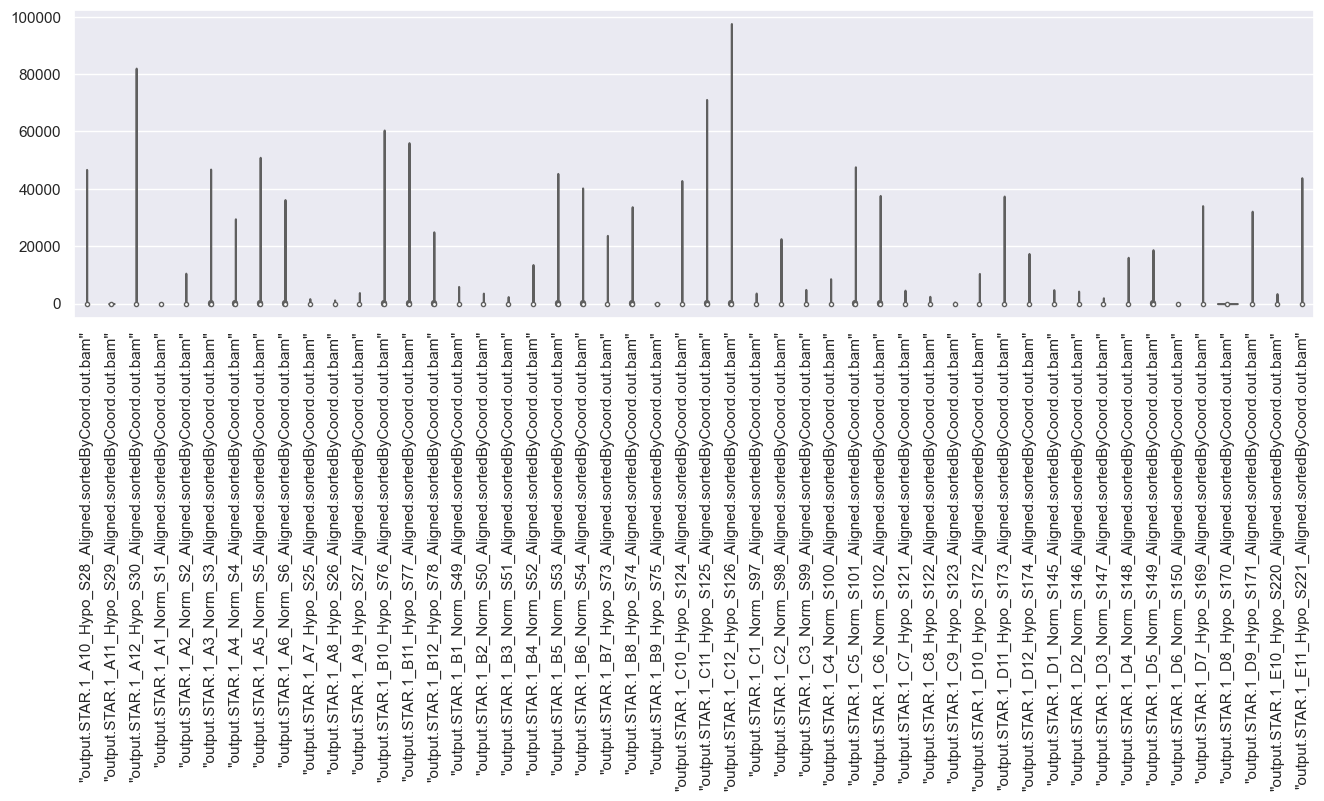

In [17]:
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=df_MCF_s_uf.iloc[:,:50],palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()



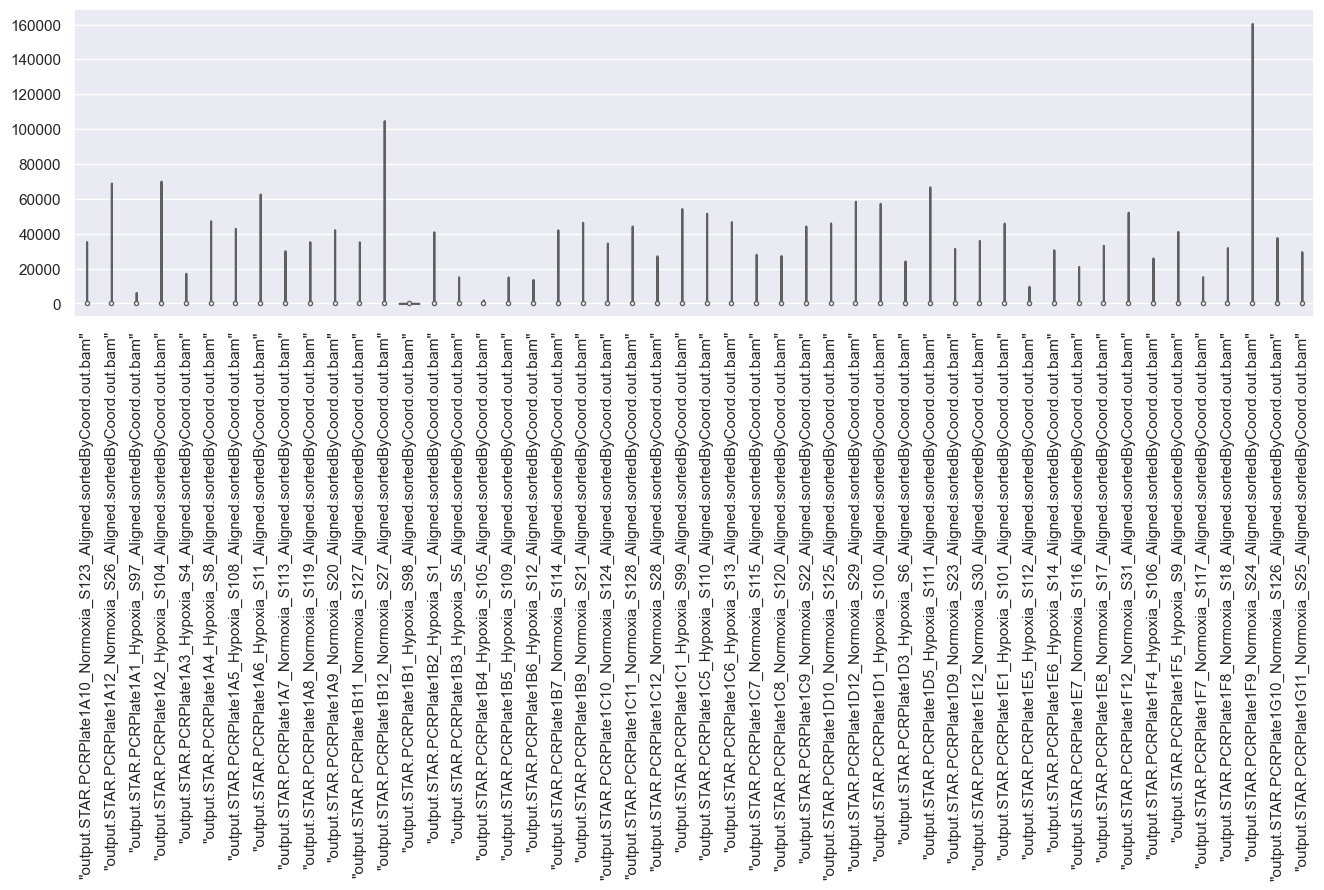

In [18]:
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=df_HCC_s_uf.iloc[:,:50],palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

In [19]:
#List of all cells that were part of the hypoxia and normoxia groups
hypo_MCF = []
norm_MCF = []
for cell in df_MCF_s_uf.columns:
    if "Hypo" in cell.split("_"):
        hypo_MCF.append(cell)
    elif "Norm" in cell.split("_"):
        norm_MCF.append(cell)
    else:
        print("Unkown:", cell)

print("Hypo:", len(hypo_MCF), "Norm:", len(hypo_MCF))

Hypo: 191 Norm: 191


In [20]:
#List of all cells that were part of the hypoxia and normoxia groups
hypo_HCC = []
norm_HCC = []
for cell in df_HCC_s_uf.columns:
    if "Hypoxia" in cell.split("_"):
        hypo_HCC.append(cell)
    elif "Normoxia" in cell.split("_"):
        norm_HCC.append(cell)
    else:
        print("Unkown:", cell)

print("Hypo:", len(hypo_HCC), "Norm:", len(hypo_HCC))

#Data sets that contain only hypoxia cells
df_MCF_hypo = df_MCF_s_uf[hypo_MCF]
df_HCC_hypo = df_HCC_s_uf[norm_HCC]
#Data sets that contain only hypoxia cells
df_MCF_norm = df_MCF_s_uf[hypo_MCF]
df_HCC_norm = df_HCC_s_uf[norm_HCC]

Hypo: 126 Norm: 126


In [65]:
#50 most common genes amoung the hypoxia cells 
genes_MCF_hypo = df_MCF_hypo.sum(axis='columns')
genes_HCC_hypo = df_HCC_hypo.sum(axis='columns')
#50 most common genes amoung the normoxia cells
genes_MCF_norm = df_MCF_norm.sum(axis='columns')
genes_HCC_norm = df_HCC_norm.sum(axis='columns')

largest_diffs_MCF = (genes_MCF_hypo.sub(genes_MCF_norm)).apply(abs).nlargest(10)
print(genes_MCF_hypo,largest_diffs_MCF, type(largest_diffs_MCF))
#Bar graph with gene occurences in hypo vs norm
width = 0.25
plt.bar(np.arange(len(genes_MCF_hypo)), genes_MCF_hypo.tolist(), color ='r', width = width,
        edgecolor ='grey', label ='Hypoxia')
plt.bar([x + width for x in np.arange(len(genes_MCF_hypo))],genes_MCF_norm.tolist(), color ='g', width = width,
        edgecolor ='grey', label ='Normoxia')

plt.legend()
plt.show()


"WASH7P"          34
"MIR6859-1"        0
"WASH9P"         330
"OR4F29"          11
"MTND1P23"         5
               ...  
"MT-TE"          866
"MT-CYB"       96752
"MT-TT"          235
"MT-TP"          828
"MAFIP"          466
Length: 22934, dtype: int64 "WASH7P"       0
"MIR6859-1"    0
"WASH9P"       0
"OR4F29"       0
"MTND1P23"     0
"MTND2P28"     0
"MTCO1P12"     0
"MTCO2P12"     0
"MTATP8P1"     0
"MTATP6P1"     0
dtype: int64 <class 'pandas.core.series.Series'>


KeyboardInterrupt: 

Outliers

In [22]:
Q1_HCC = df.quantile(0.25)
Q3_HCC = df.quantile(0.75)
Q1_MCF = df.quantile(0.25)
Q3_MCF = df.quantile(0.75)
IQR_HCC = Q3_HCC - Q1_HCC
IQR_MCF = Q3_MCF - Q1_MCF
print("HCC:\n", IQR_HCC)
print("MCF:\n", IQR_MCF)

HCC:
 "output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"     51.0
"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"     125.0
"output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"         5.0
"output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"       40.0
"output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"         22.0
                                                                          ...  
"output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam"     76.0
"output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam"     24.0
"output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam"       68.0
"output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam"      22.0
"output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam"      44.0
Length: 243, dtype: float64
MCF:
 "output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"     51.0


We eliminate outliers with quantiles

In [23]:
df_HCC_noOut = df_HCC_s_uf[~((df_HCC_s_uf < (Q1_HCC - 1.5 * IQR_HCC)) |(df_HCC_s_uf > (Q3_HCC + 1.5 * IQR_HCC))).any(axis=1)]
df_HCC_noOut.shape
df_HCC_noOut.head(3)



"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                        
"CICP27"                                                    0                        
"DDX11L17"                                                  0                        

            "output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                       
"CICP27"                                                    0                       
"DDX11L17"                                                  0                       

            "output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                     
"CICP27"                                                    0                     
"DDX11L17"                                                  0                     

            "output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                      
"CICP27"                                                    0                      
"DDX11L17"                                                  0                      

            "output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                    
"CICP27"                                                    0                    
"DDX11L17"                                                  0                    

            "output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                    
"CICP27"                                                    0                    
"DDX11L17"                                                  1                    

            "output.STAR.PCRPlate1A5_Hypoxia_S108_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                      
"CICP27"                                                    0                      
"DDX11L17"                                                  0                      

            "output.STAR.PCRPlate1A6_Hypoxia_S11_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                     
"CICP27"                                                    0                     
"DDX11L17"                                                  0                     

            "output.STAR.PCRPlate1A7_Normoxia_S113_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                       
"CICP27"                                                    0                       
"DDX11L17"                                                  0                       

            "output.STAR.PCRPlate1A8_Normoxia_S119_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                       
"CICP27"                                                    0                       
"DDX11L17"                                                  0                       

            ...  \
"WASH7P"    ...   
"CICP27"    ...   
"DDX11L17"  ...   

            "output.STAR.PCRPlate4G12_Normoxia_S243_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                        
"CICP27"                                                    0                        
"DDX11L17"                                                  0                        

            "output.STAR.PCRPlate4G1_Hypoxia_S193_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                      
"CICP27"                                                

In [24]:
df_MCF_noOut = df_MCF_s_uf[~((df_MCF_s_uf < (Q1_MCF - 1.5 * IQR_MCF)) |(df > (Q3_MCF + 1.5 * IQR_MCF))).any(axis=1)]
df_MCF_noOut.shape
df_MCF_noOut.head(3)


C:\Users\mattb\AppData\Local\Temp\ipykernel_6636\366954624.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_MCF_noOut = df_MCF_s_uf[~((df_MCF_s_uf < (Q1_MCF - 1.5 * IQR_MCF)) |(df > (Q3_MCF + 1.5 * IQR_MCF))).any(axis=1)]
C:\Users\mattb\AppData\Local\Temp\ipykernel_6636\366954624.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_MCF_noOut = df_MCF_s_uf[~((df_MCF_s_uf < (Q1_MCF - 1.5 * IQR_MCF)) |(df > (Q3_MCF + 1.5 * IQR_MCF))).any(axis=1)]


"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0            
"MIR6859-1"                                                  0            
"WASH9P"                                                     1            

             "output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0            
"MIR6859-1"                                                  0            
"WASH9P"                                                     0            

             "output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0            
"MIR6859-1"                                                  0            
"WASH9P"                                                     0            

             "output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0          
"MIR6859-1"                                                  0          
"WASH9P"                                                     0          

             "output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0          
"MIR6859-1"                                                  0          
"WASH9P"                                                     0          

             "output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0          
"MIR6859-1"                                                  0          
"WASH9P"                                                     1          

             "output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0          
"MIR6859-1"                                                  0          
"WASH9P"                                                    10          

             "output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0          
"MIR6859-1"                                                  0          
"WASH9P"                                                     1          

             "output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0          
"MIR6859-1"                                                  0          
"WASH9P"                                                     0          

             "output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam"  ...  \
"WASH7P"                                                     0          ...   
"MIR6859-1"                                                  0          ...   
"WASH9P"                                                     0          ...   

             "output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0             
"MIR6859-1"                                                  0             
"WASH9P"                                                     1             

             "output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0            
"MIR6859-1"                                                  0            
"WASH9P"                                                     1            

             "output.STAR.4_H2_Norm_S356_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0            
"MIR6859-1"                                                  0            
"WASH9P"                                                     0            

             "output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                             

Number of remaining occurences: 290055880


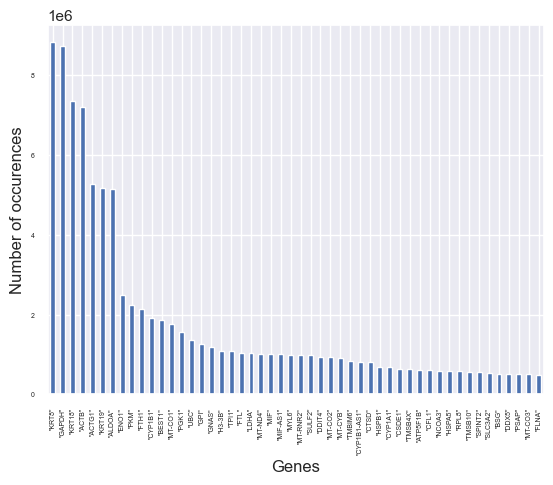

In [25]:
#Representing how often a specific gene is found in a cell(I picked the 50 largest ones)
largest_MCF = df_MCF_s_uf.sum(axis='columns').nlargest(50)
remaining_MCF = df_MCF_s_uf.sum(axis='columns').sum() - df_MCF_s_uf.sum(axis='columns')[largest_MCF.index.values].sum()
print("Number of remaining occurences:", remaining_MCF)
ax = largest_MCF.plot.bar(stacked = True, fontsize = 5)
plt.xlabel('Genes')
plt.ylabel('Number of occurences')
plt.show()

Number of remaining occurences: 409511559


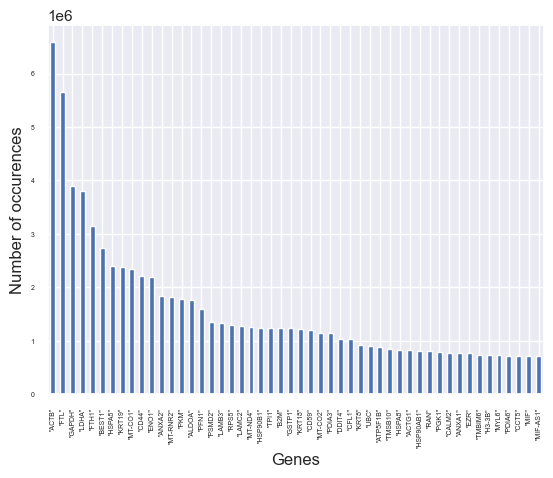

In [26]:
#Representing how often a specific gene is found in a cell(I picked the 50 largest ones)
largest_HCC = df_HCC_s_uf.sum(axis='columns').nlargest(50)
remaining_HCC = df_HCC_s_uf.sum(axis='columns').sum() - df_HCC_s_uf.sum(axis='columns')[largest_HCC.index.values].sum()
print("Number of remaining occurences:", remaining_HCC)
ax = largest_HCC.plot.bar(stacked = True, fontsize = 5)
plt.xlabel('Genes')
plt.ylabel('Number of occurences')
plt.show()

NOT GOOD AS DATA IS SPARCE

words or counts of categorical data. On the other hand, features with dense data have predominantly non-zero values.

can you quantify the sparsity?

would using sparse matrix representation be an advantage?

what would you do to adress this sparsity?

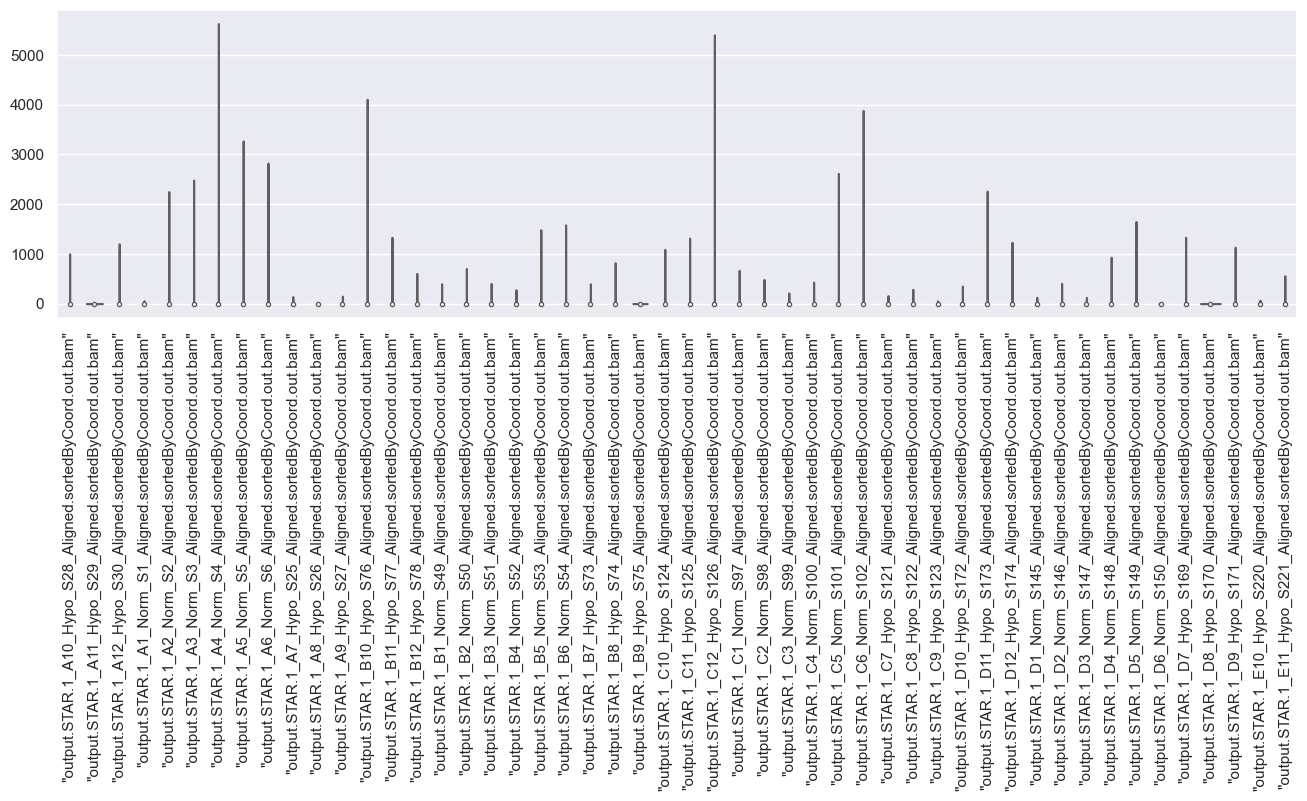

In [27]:
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=df_MCF_noOut.iloc[:,:50],palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()



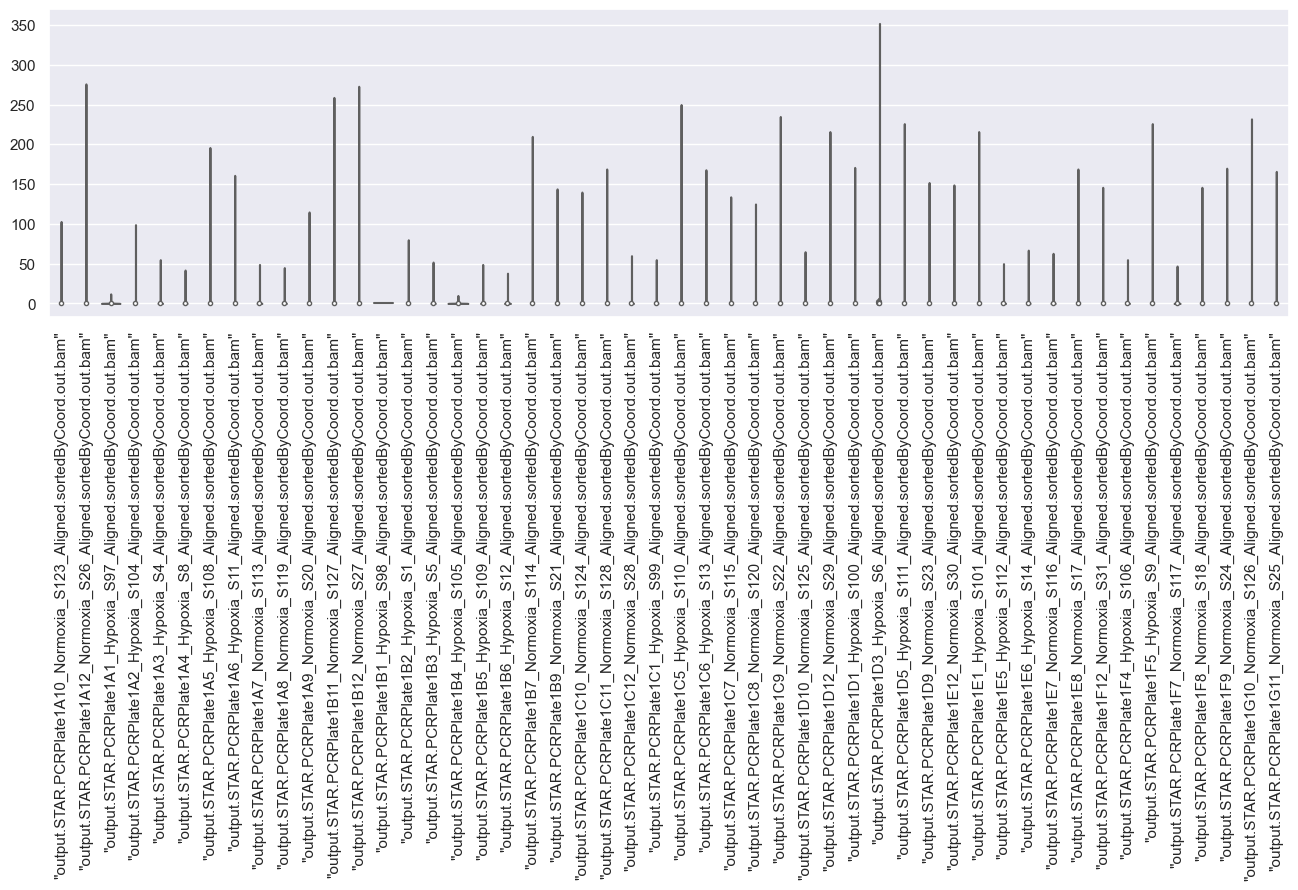

In [28]:
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=df_HCC_noOut.iloc[:,:50],palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

Distribiution

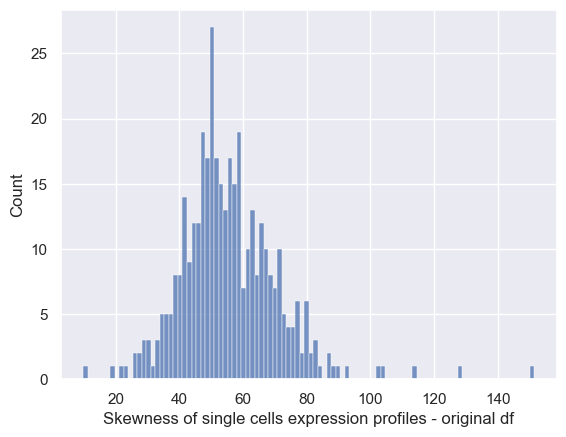

In [29]:
#Skewness
from scipy.stats import kurtosis, skew

def skewness(df):
  cnames = list(df.columns)
  colN = np.shape(df)[1]

  df_skew_cells = []
  for i in range(colN) :     
      v_df = df[cnames[i]]
      df_skew_cells += [skew(v_df)]   
    #  df_skew_cells += [df[cnames[i]].skew()]
  df_skew_cells
  sns.histplot(df_skew_cells,bins=100)
  plt.xlabel('Skewness of single cells expression profiles - original df')
  plt.show()
  #print( "Skewness of normal distribution: ", skew(df_skew_cells) )
skewness(df_MCF_s_uf)

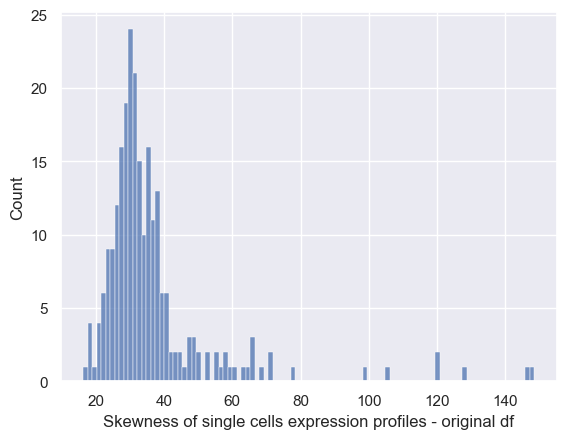

In [30]:
skewness(df_HCC_s_uf)

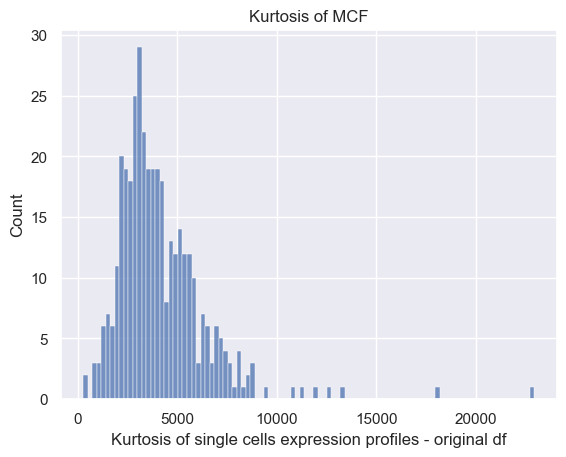

In [31]:
#Kurtosis

def kurtosis_cal(df):
    cnames = list(df.columns)
    df_kurt_cells = []
    colN = np.shape(df)[1]
    for i in range(colN) :     
        v_df = df[cnames[i]]
        df_kurt_cells += [kurtosis(v_df)]   
    #   df_kurt_cells += [df[cnames[i]].kurt()]
    df_kurt_cells
    sns.histplot(df_kurt_cells,bins=100)
    plt.xlabel('Kurtosis of single cells expression profiles - original df')
    plt.title("Kurtosis of MCF")
    plt.show()
    #print( "Excess kurtosis of normal distribution: ",  kurtosis(df_kurt_cells) )
kurtosis_cal(df_MCF_s_uf)

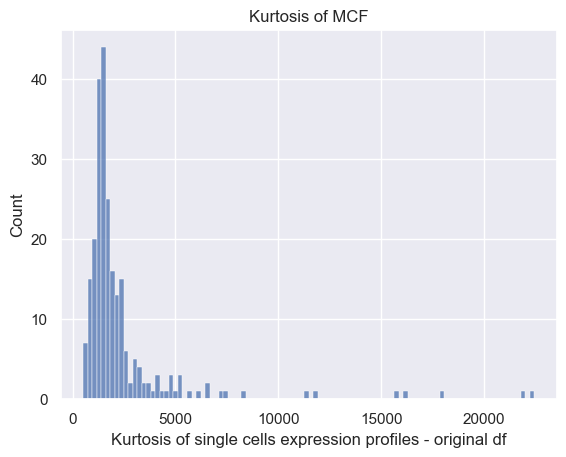

In [32]:
kurtosis_cal(df_HCC_s_uf)

The distribution are highly non-normal, skewed with heavy tails. Why is this a problem?

Data Transformation

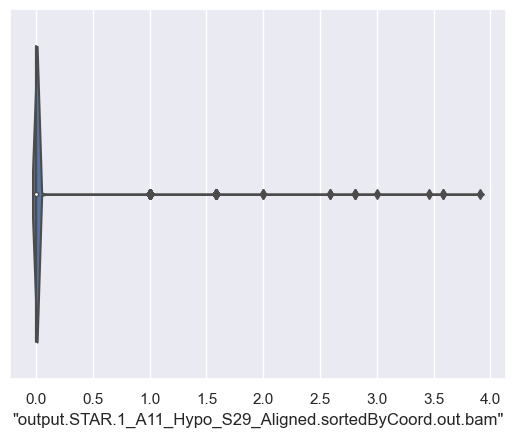

In [33]:
#Log transformation
def transform_log2(df):
    cnames = list(df.columns)
    df_log2 = np.log2(df[cnames[1]]+1)
    return df_log2


sns.boxplot(x=transform_log2(df_MCF_s_uf))
sns.violinplot(x=transform_log2(df_MCF_s_uf))
plt.show()

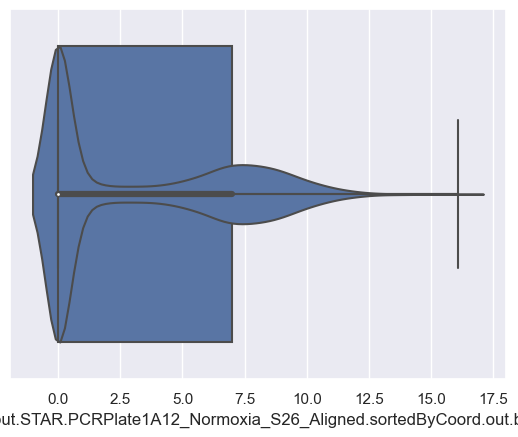

In [34]:
sns.boxplot(x=transform_log2(df_HCC_s_uf))
sns.violinplot(x=transform_log2(df_HCC_s_uf))
plt.show()

[None, None]

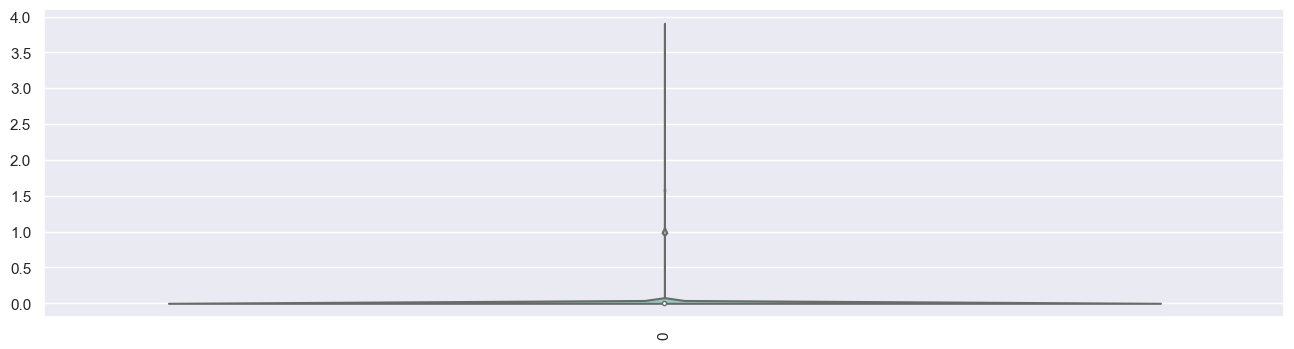

In [35]:
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=transform_log2(df_MCF_s_uf),palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)

[None, None]

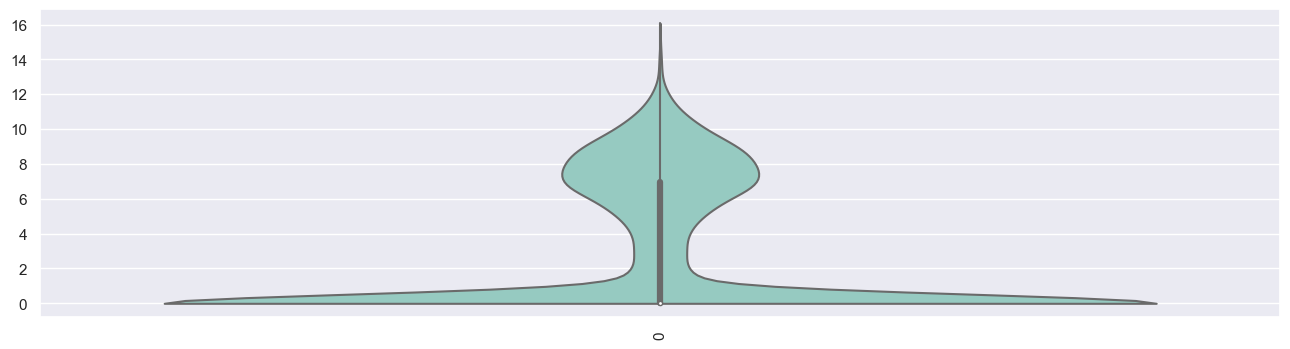

In [36]:
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=transform_log2(df_HCC_s_uf),palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)

Normalizing

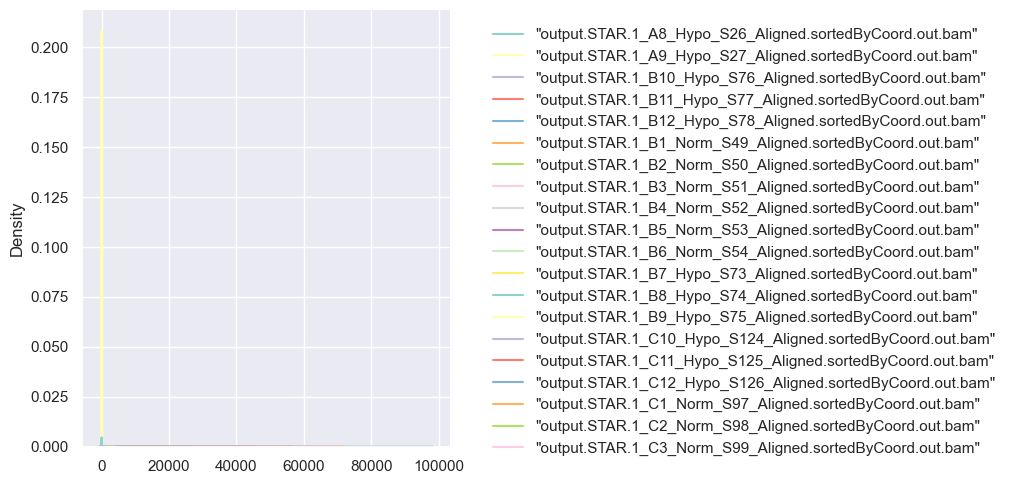

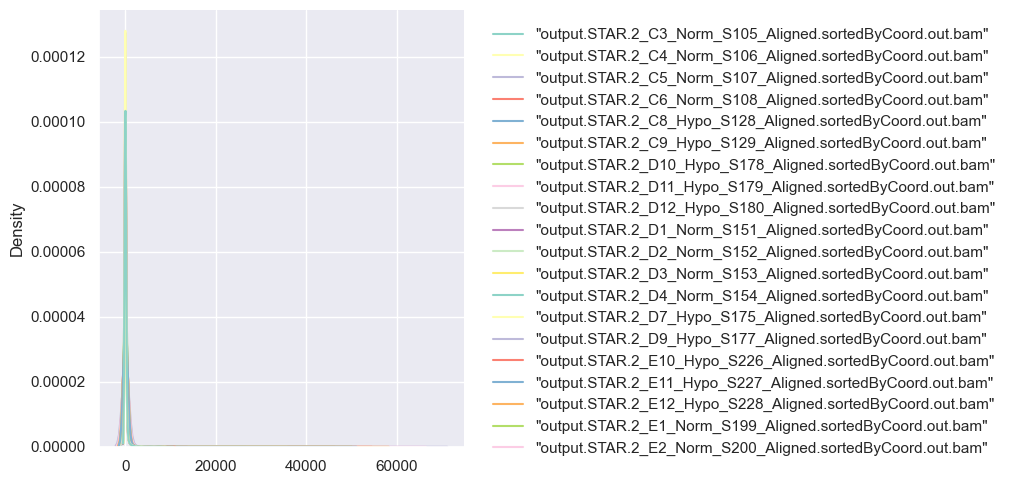

In [37]:
def graph_normalization(df):
    df_small = df.iloc[:, 10:30]  #just selecting part of the samples so run time not too long
    sns.displot(data=df_small,palette="Set3",kind="kde", bw_adjust=2)
    plt.show()

graph_normalization(df_MCF_s_uf)
graph_normalization(df_MCF_s_f_n_train)

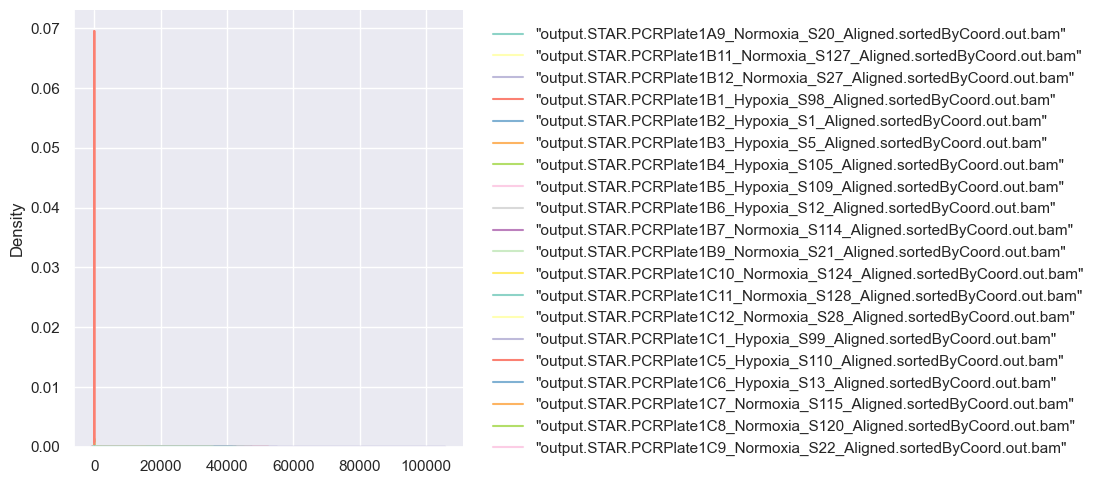

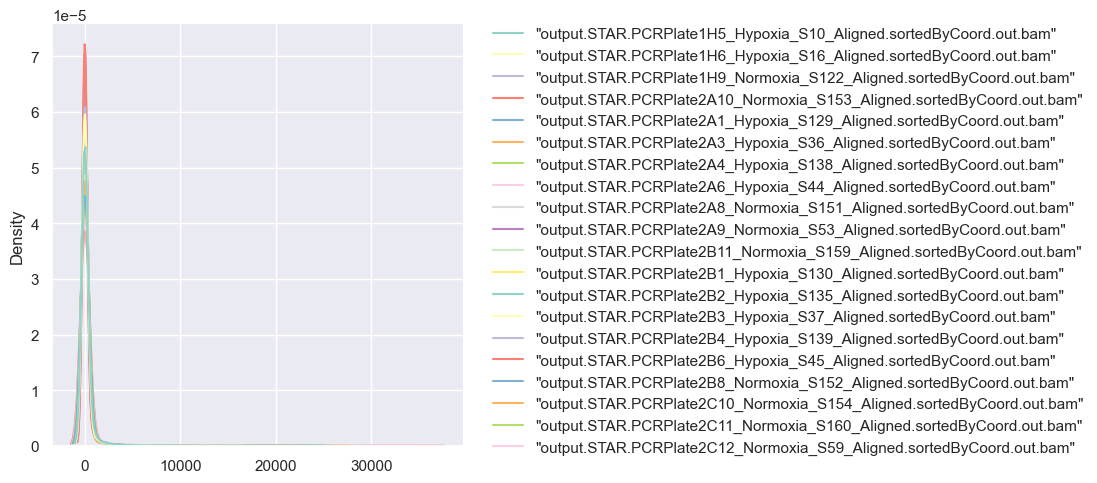

In [38]:
graph_normalization(df_HCC_s_uf)
graph_normalization(df_HCC_s_f_n_train)

Duplicate rows

In [39]:
def duplicate_rows(df, all_cells = False, shape = False):
    if shape:
        print("Number of duplicate rows: ", df[df.duplicated(keep=False)].shape)
    if all_cells:
        print("Number of duplicate rows: ", df[df.duplicated(keep=False)])
    return df[df.duplicated(keep=False)]

duplicate_rows(df_MCF_s_uf)

"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"  \
"SHISAL2A"                                                         0            
"IL12RB2"                                                          0            
"S1PR1"                                                            0            
"CD84"                                                             0            
"GNLY"                                                             0            
"FAR2P3"                                                           0            
"KLF2P3"                                                           0            
"PABPC1P2"                                                         0            
"UGT1A8"                                                           0            
"UGT1A9"                                                           0            
"SLC22A14"                                                         0            
"COQ10BP2"                                                         0            
"PANDAR"                                                           0            
"LAP3P2"                                                           0            
"RPL22P16"                                                         0            
"GALNT17"                                                          0            
"PON1"                                                             0            
"HTR5A"                                                            0            
"SNORA36A"                                                         0            
"MIR664B"                                                          0            
"CSMD1"                                                            0            
"KCNS2"                                                            0            
"MIR548AA1"                                                        0            
"MIR548D1"                                                         0            
"MTCO2P11"                                                         0            
"CLCN3P1"                                                          0            
"SUGT1P4-STRA6LP"                                                  0            
"STRA6LP"                                                          0            
"MUC6"                                                             0            
"VSTM4"                                                            0            
"LINC00856"                                                        0            
"LINC00595"                                                        0            
"CACYBPP1"                                                         0            
"LINC00477"                                                        0            
"KNOP1P1"                                                          0            
"WDR95P"                                                           0            
"MIR20A"                                                           0            
"MIR19B1"                                                          0            
"RPL21P5"                                                          0            
"RNU6-539P"                                                        0            
"SNRPN"                                                            0            
"SNURF"                                                            0            
"RBFOX1"                                                           0            
"LINC02183"                                                        0            
"MT1M"                                                             0            
"ASPA"                                                             0            
"BCL6B"                                                            0            
"CCL3L3"                                                           0            
"CCL3L1"                                          

In [40]:
duplicate_rows(df_MCF_s_uf, True, True)

Number of duplicate rows:  (56, 383)
Number of duplicate rows:                     "output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"  \
"SHISAL2A"                                                         0            
"IL12RB2"                                                          0            
"S1PR1"                                                            0            
"CD84"                                                             0            
"GNLY"                                                             0            
"FAR2P3"                                                           0            
"KLF2P3"                                                           0            
"PABPC1P2"                                                         0            
"UGT1A8"                                                           0            
"UGT1A9"                                                           0            
"SLC22A14"                                   

"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"  \
"SHISAL2A"                                                         0            
"IL12RB2"                                                          0            
"S1PR1"                                                            0            
"CD84"                                                             0            
"GNLY"                                                             0            
"FAR2P3"                                                           0            
"KLF2P3"                                                           0            
"PABPC1P2"                                                         0            
"UGT1A8"                                                           0            
"UGT1A9"                                                           0            
"SLC22A14"                                                         0            
"COQ10BP2"                                                         0            
"PANDAR"                                                           0            
"LAP3P2"                                                           0            
"RPL22P16"                                                         0            
"GALNT17"                                                          0            
"PON1"                                                             0            
"HTR5A"                                                            0            
"SNORA36A"                                                         0            
"MIR664B"                                                          0            
"CSMD1"                                                            0            
"KCNS2"                                                            0            
"MIR548AA1"                                                        0            
"MIR548D1"                                                         0            
"MTCO2P11"                                                         0            
"CLCN3P1"                                                          0            
"SUGT1P4-STRA6LP"                                                  0            
"STRA6LP"                                                          0            
"MUC6"                                                             0            
"VSTM4"                                                            0            
"LINC00856"                                                        0            
"LINC00595"                                                        0            
"CACYBPP1"                                                         0            
"LINC00477"                                                        0            
"KNOP1P1"                                                          0            
"WDR95P"                                                           0            
"MIR20A"                                                           0            
"MIR19B1"                                                          0            
"RPL21P5"                                                          0            
"RNU6-539P"                                                        0            
"SNRPN"                                                            0            
"SNURF"                                                            0            
"RBFOX1"                                                           0            
"LINC02183"                                                        0            
"MT1M"                                                             0            
"ASPA"                                                             0            
"BCL6B"                                                            0            
"CCL3L3"                                                           0            
"CCL3L1"                                          

Check where the duplicates are

In [41]:
duplicate_rows_df_MCF_t = duplicate_rows(df_MCF_s_uf).T
c_dupl_MCF = duplicate_rows_df_MCF_t.corr()
c_dupl_MCF

"SHISAL2A"  "IL12RB2"   "S1PR1"    "CD84"    "GNLY"  \
"SHISAL2A"           1.000000   0.630630  0.654887  0.312826  0.497375   
"IL12RB2"            0.630630   1.000000  0.829681  0.799056  0.630630   
"S1PR1"              0.654887   0.829681  1.000000  0.412553  0.654887   
"CD84"               0.312826   0.799056  0.412553  1.000000  0.312826   
"GNLY"               0.497375   0.630630  0.654887  0.312826  1.000000   
"FAR2P3"            -0.008333  -0.007903 -0.007656 -0.007903 -0.008333   
"KLF2P3"            -0.008333  -0.007903 -0.007656 -0.007903 -0.008333   
"PABPC1P2"           0.497375   0.948434  0.654887  0.948434  0.497375   
"UGT1A8"            -0.009322  -0.008841 -0.008565 -0.008841 -0.009322   
"UGT1A9"            -0.009322  -0.008841 -0.008565 -0.008841 -0.009322   
"SLC22A14"           0.497375   0.948434  0.654887  0.948434  0.497375   
"COQ10BP2"           1.000000   0.630630  0.654887  0.312826  0.497375   
"PANDAR"            -0.020348  -0.019299 -0.018695 -0.019299 -0.020348   
"LAP3P2"            -0.020348  -0.019299 -0.018695 -0.019299 -0.020348   
"RPL22P16"          -0.005249  -0.004979 -0.004823 -0.004979 -0.005249   
"GALNT17"            0.630630   1.000000  0.829681  0.799056  0.630630   
"PON1"               0.630630   1.000000  0.829681  0.799056  0.630630   
"HTR5A"             -0.005249  -0.004979 -0.004823 -0.004979 -0.005249   
"SNORA36A"          -0.004499  -0.004267 -0.004134 -0.004267 -0.004499   
"MIR664B"           -0.004499  -0.004267 -0.004134 -0.004267 -0.004499   
"CSMD1"              0.112487   0.586533  0.149322  0.955646  0.112487   
"KCNS2"              0.497375   0.630630  0.654887  0.312826  1.000000   
"MIR548AA1"         -0.004979  -0.004722 -0.004574 -0.004722 -0.004979   
"MIR548D1"          -0.004979  -0.004722 -0.004574 -0.004722 -0.004979   
"MTCO2P11"          -0.005249  -0.004979 -0.004823 -0.004979 -0.005249   
"CLCN3P1"            0.134926   0.612365  0.178813  0.964653  0.134926   
"SUGT1P4-STRA6LP"    0.001061  -0.021672 -0.020994 -0.021672 -0.022850   
"STRA6LP"            0.001061  -0.021672 -0.020994 -0.021672 -0.022850   
"MUC6"               0.654887   0.829681  1.000000  0.412553  0.654887   
"VSTM4"              0.497375   0.630630  0.654887  0.312826  0.497375   
"LINC00856"         -0.007671  -0.007275  0.028008 -0.007275 -0.007671   
"LINC00595"         -0.007671  -0.007275  0.028008 -0.007275 -0.007671   
"CACYBPP1"          -0.005249  -0.004979 -0.004823 -0.004979 -0.005249   
"LINC00477"         -0.007029  -0.006667 -0.006458 -0.006667 -0.007029   
"KNOP1P1"           -0.007029  -0.006667 -0.006458 -0.006667 -0.007029   
"WDR95P"             0.312826   0.799056  0.412553  1.000000  0.312826   
"MIR20A"            -0.004979  -0.004722 -0.004574 -0.004722 -0.004979   
"MIR19B1"           -0.004979  -0.004722 -0.004574 -0.004722 -0.004979   
"RPL21P5"            0.497375   0.630630  0.654887  0.312826  0.497375   
"RNU6-539P"         -0.005249  -0.004979 -0.004823 -0.004979 -0.005249   
"SNRPN"             -0.005249  -0.004979 -0.004823 -0.004979 -0.005249   
"SNURF"             -0.005249  -0.004979 -0.004823 -0.004979 -0.005249   
"RBFOX1"             0.497375   0.630630  0.654887  0.312826  0.497375   
"LINC02183"          0.630630   0.799056  0.829681  0.397167  0.948434   
"MT1M"               0.630630   0.799056  0.829681  0.397167  0.630630   
"ASPA"               0.630630   0.799056  0.829681  0.397167  0.630630   
"BCL6B"              0.497375   0.630630  0.654887  0.312826  1.000000   
"CCL3L3"            -0.007615  -0.007222 -0.006996 -0.007222  0.021357   
"CCL3L1"            -0.007615  -0.007222 -0.006996 -0.007222  0.021357   
"OTOP3"              0.134926   0.612365  0.178813  0.964653  0.134926   
"RNA5SP450"         -0.005249  -0.004979 -0.004823 -0.004979 -0.005249   
"PSG1"               0.497375   0.630630  0.654887  0.312826  0.497375   
"MIR3190"           -0.005249  -0.004979 -0.004823 -0.004979 -0.005249   
"MIR3191"           -0.

In [42]:
duplicate_rows_df_HCC_t = duplicate_rows(df_HCC_s_uf).T
c_dupl_HCC = duplicate_rows_df_HCC_t.corr()
c_dupl_HCC

"MMP23A"  "LINC01647"  "LINC01361"  "ITGA10"    "RORC"   "GPA33"  \
"MMP23A"     1.000000    -0.008299    -0.008299 -0.008299 -0.008299 -0.008299   
"LINC01647" -0.008299     1.000000     0.495851  0.495851 -0.008299  0.495851   
"LINC01361" -0.008299     0.495851     1.000000  1.000000  0.495851  1.000000   
"ITGA10"    -0.008299     0.495851     1.000000  1.000000  0.495851  1.000000   
"RORC"      -0.008299    -0.008299     0.495851  0.495851  1.000000  0.495851   
...               ...          ...          ...       ...       ...       ...   
"ENPP7"     -0.008299     0.495851     0.495851  0.495851 -0.008299  0.495851   
"DTNA"      -0.008299     0.495851     1.000000  1.000000  0.495851  1.000000   
"ALPK2"     -0.006540     0.788121     0.081755  0.081755 -0.006540  0.081755   
"OR7G2"     -0.008299     0.495851     0.495851  0.495851 -0.008299  0.495851   
"PLVAP"     -0.008299     0.495851     1.000000  1.000000  0.495851  1.000000   

              "OR2M4"  "LINC01247"  "SNORD92"  "LINC01106"  ...  "MSX2P1"  \
"MMP23A"    -0.008299    -0.008299  -0.008299    -0.010083  ... -0.008299   
"LINC01647" -0.008299     0.495851  -0.008299     0.234944  ... -0.008299   
"LINC01361"  0.495851     0.495851  -0.008299    -0.010083  ... -0.008299   
"ITGA10"     0.495851     0.495851  -0.008299    -0.010083  ... -0.008299   
"RORC"       1.000000    -0.008299  -0.008299    -0.010083  ... -0.008299   
...               ...          ...        ...          ...  ...       ...   
"ENPP7"     -0.008299     0.495851  -0.008299    -0.010083  ... -0.008299   
"DTNA"       0.495851     0.495851  -0.008299    -0.010083  ... -0.008299   
"ALPK2"     -0.006540     0.081755  -0.006540     0.335362  ... -0.006540   
"OR7G2"     -0.008299     0.495851  -0.008299    -0.010083  ... -0.008299   
"PLVAP"      0.495851     0.495851  -0.008299    -0.010083  ... -0.008299   

             "MIR548D2"  "MIR548AA2"  "KCNJ16"  "CD300A"   "ENPP7"    "DTNA"  \
"MMP23A"      -0.009421    -0.009421 -0.008299 -0.008299 -0.008299 -0.008299   
"LINC01647"   -0.009421    -0.009421  0.495851  0.495851  0.495851  0.495851   
"LINC01361"   -0.009421    -0.009421  0.495851  1.000000  0.495851  1.000000   
"ITGA10"      -0.009421    -0.009421  0.495851  1.000000  0.495851  1.000000   
"RORC"        -0.009421    -0.009421 -0.008299  0.495851 -0.008299  0.495851   
...                 ...          ...       ...       ...       ...       ...   
"ENPP7"       -0.009421    -0.009421  0.495851  0.495851  1.000000  0.495851   
"DTNA"        -0.009421    -0.009421  0.495851  1.000000  0.495851  1.000000   
"ALPK2"       -0.007425    -0.007425  0.081755  0.081755  0.081755  0.081755   
"OR7G2"       -0.009421    -0.009421  0.495851  0.495851  0.495851  0.495851   
"PLVAP"       -0.009421    -0.009421  0.495851  1.000000  0.495851  1.000000   

              "ALPK2"   "OR7G2"   "PLVAP"  
"MMP23A"    -0.006540 -0.008299 -0.008299  
"LINC01647"  0.788121  0.495851  0.495851  
"LINC01361"  0.081755  0.495851  1.000000  
"ITGA10"     0.081755  0.495851  1.000000  
"RORC"      -0.006540 -0.008299  0.495851  
...               ...       ...       ...  
"ENPP7"      0.081755  0.495851  0.495851  
"DTNA"       0.081755  0.495851  1.000000  
"ALPK2"      1.000000  0.081755  0.081755  
"OR7G2"      0.081755  1.000000  0.495851  
"PLVAP"      0.081755  0.495851  1.000000  

[89 rows x 89 columns]

In [43]:
# warning: the scatter plots below might take a long time if the number of duplicate features is large
# sns.pairplot(duplicate_rows_df_MCF_t)
# sns.pairplot(duplicate_rows_df_HCC_t)

We can look at the statistics of the gene expression profiles of genes/features that seem duplicates. They might be features with many zeros, or many missing data.

In [44]:
duplicate_rows_df_MCF_t.describe()

"SHISAL2A"   "IL12RB2"     "S1PR1"      "CD84"      "GNLY"    "FAR2P3"  \
count  383.000000  383.000000  383.000000  383.000000  383.000000  383.000000   
mean     0.005222    0.007833    0.018277    0.007833    0.005222    0.013055   
std      0.072168    0.114138    0.274921    0.114138    0.072168    0.113658   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    2.000000    5.000000    2.000000    1.000000    1.000000   

         "KLF2P3"  "PABPC1P2"    "UGT1A8"    "UGT1A9"  ...     "BCL6B"  \
count  383.000000  383.000000  383.000000  383.000000  ...  383.000000   
mean     0.013055    0.005222    0.704961    0.704961  ...    0.005222   
std      0.113658    0.072168    5.486218    5.486218  ...    0.072168   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000   78.000000   78.000000  ...    1.000000   

         "CCL3L3"    "CCL3L1"     "OTOP3"  "RNA5SP450"      "PSG1"  \
count  383.000000  383.000000  383.000000   383.000000  383.000000   
mean     0.394256    0.394256    0.015666     0.005222    0.005222   
std      3.756135    3.756135    0.260417     0.072168    0.072168   
min      0.000000    0.000000    0.000000     0.000000    0.000000   
25%      0.000000    0.000000    0.000000     0.000000    0.000000   
50%      0.000000    0.000000    0.000000     0.000000    0.000000   
75%      0.000000    0.000000    0.000000     0.000000    0.000000   
max     66.000000   66.000000    5.000000     1.000000    1.000000   

        "MIR3190"   "MIR3191"     "SEZ6L"   "ADAMTS5"  
count  383.000000  383.000000  383.000000  383.000000  
mean     0.005222    0.005222    0.018277    0.007833  
std      0.072168    0.072168    0.310683    0.114138  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    6.000000    2.000000  

[8 rows x 56 columns]

In [45]:
duplicate_rows_df_HCC_t.describe()

"MMP23A"  "LINC01647"  "LINC01361"    "ITGA10"      "RORC"  \
count  243.000000   243.000000   243.000000  243.000000  243.000000   
mean     0.008230     0.008230     0.008230    0.008230    0.008230   
std      0.090534     0.090534     0.090534    0.090534    0.090534   
min      0.000000     0.000000     0.000000    0.000000    0.000000   
25%      0.000000     0.000000     0.000000    0.000000    0.000000   
50%      0.000000     0.000000     0.000000    0.000000    0.000000   
75%      0.000000     0.000000     0.000000    0.000000    0.000000   
max      1.000000     1.000000     1.000000    1.000000    1.000000   

          "GPA33"     "OR2M4"  "LINC01247"   "SNORD92"  "LINC01106"  ...  \
count  243.000000  243.000000   243.000000  243.000000   243.000000  ...   
mean     0.008230    0.008230     0.008230    0.008230     0.041152  ...   
std      0.090534    0.090534     0.090534    0.090534     0.372552  ...   
min      0.000000    0.000000     0.000000    0.000000     0.000000  ...   
25%      0.000000    0.000000     0.000000    0.000000     0.000000  ...   
50%      0.000000    0.000000     0.000000    0.000000     0.000000  ...   
75%      0.000000    0.000000     0.000000    0.000000     0.000000  ...   
max      1.000000    1.000000     1.000000    1.000000     5.000000  ...   

         "MSX2P1"  "MIR548D2"  "MIR548AA2"    "KCNJ16"    "CD300A"  \
count  243.000000  243.000000   243.000000  243.000000  243.000000   
mean     0.008230    0.024691     0.024691    0.008230    0.008230   
std      0.090534    0.239247     0.239247    0.090534    0.090534   
min      0.000000    0.000000     0.000000    0.000000    0.000000   
25%      0.000000    0.000000     0.000000    0.000000    0.000000   
50%      0.000000    0.000000     0.000000    0.000000    0.000000   
75%      0.000000    0.000000     0.000000    0.000000    0.000000   
max      1.000000    3.000000     3.000000    1.000000    1.000000   

          "ENPP7"      "DTNA"     "ALPK2"     "OR7G2"     "PLVAP"  
count  243.000000  243.000000  243.000000  243.000000  243.000000  
mean     0.008230    0.008230    0.037037    0.008230    0.008230  
std      0.090534    0.090534    0.516931    0.090534    0.090534  
min      0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    8.000000    1.000000    1.000000  

[8 rows x 89 columns]

Dropping duplicates

In [46]:
df_MCF_noDup = df_MCF_s_uf.drop_duplicates()
df_HCC_noDup = df_HCC_s_uf.drop_duplicates()

print(df_MCF_noDup.count())
print(df_HCC_noDup.count())

"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"    22905
"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"    22905
"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"    22905
"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"      22905
"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"      22905
                                                              ...  
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam"    22905
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam"    22905
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam"    22905
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam"    22905
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"    22905
Length: 383, dtype: int64
"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"    23342
"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"     23342
"output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam

Data Structure

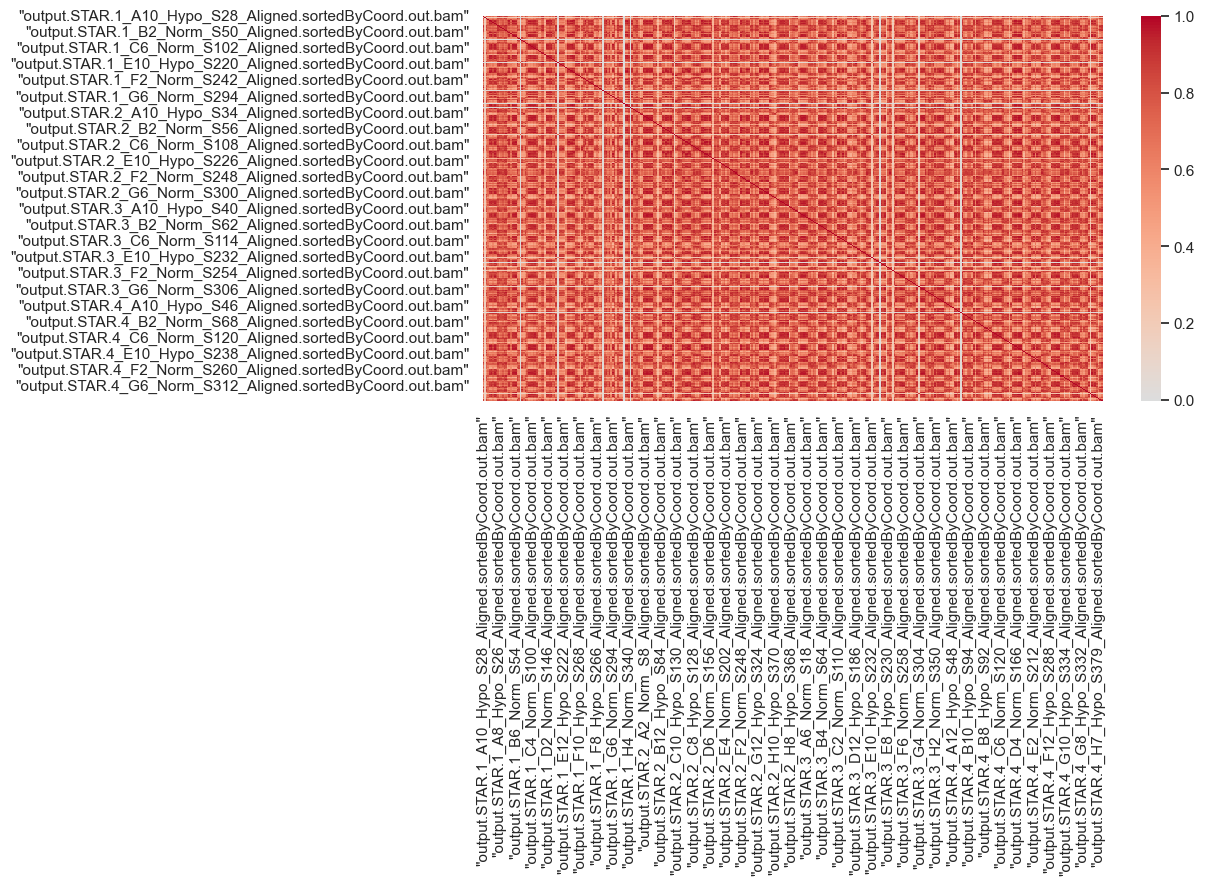

Number of cells included:  (383, 383)
Average correlation of expression profiles between cells:  0.4989810753533692
Min. correlation of expression profiles between cells:  -0.0020378492932616927


In [47]:
plt.figure(figsize=(10,5))

c_MCF = df_MCF_s_uf.corr()
midpoint = (c_MCF.values.max() - c_MCF.values.min()) /2 + c_MCF.values.min()
# sns.heatmap(c,cmap='coolwarm',annot=True, center=midpoint )
# plt.show()
sns.heatmap(c_MCF,cmap='coolwarm', center=0 )
plt.show()
print("Number of cells included: ", np.shape(c_MCF))
print("Average correlation of expression profiles between cells: ", midpoint)
print("Min. correlation of expression profiles between cells: ", c_MCF.values.min())

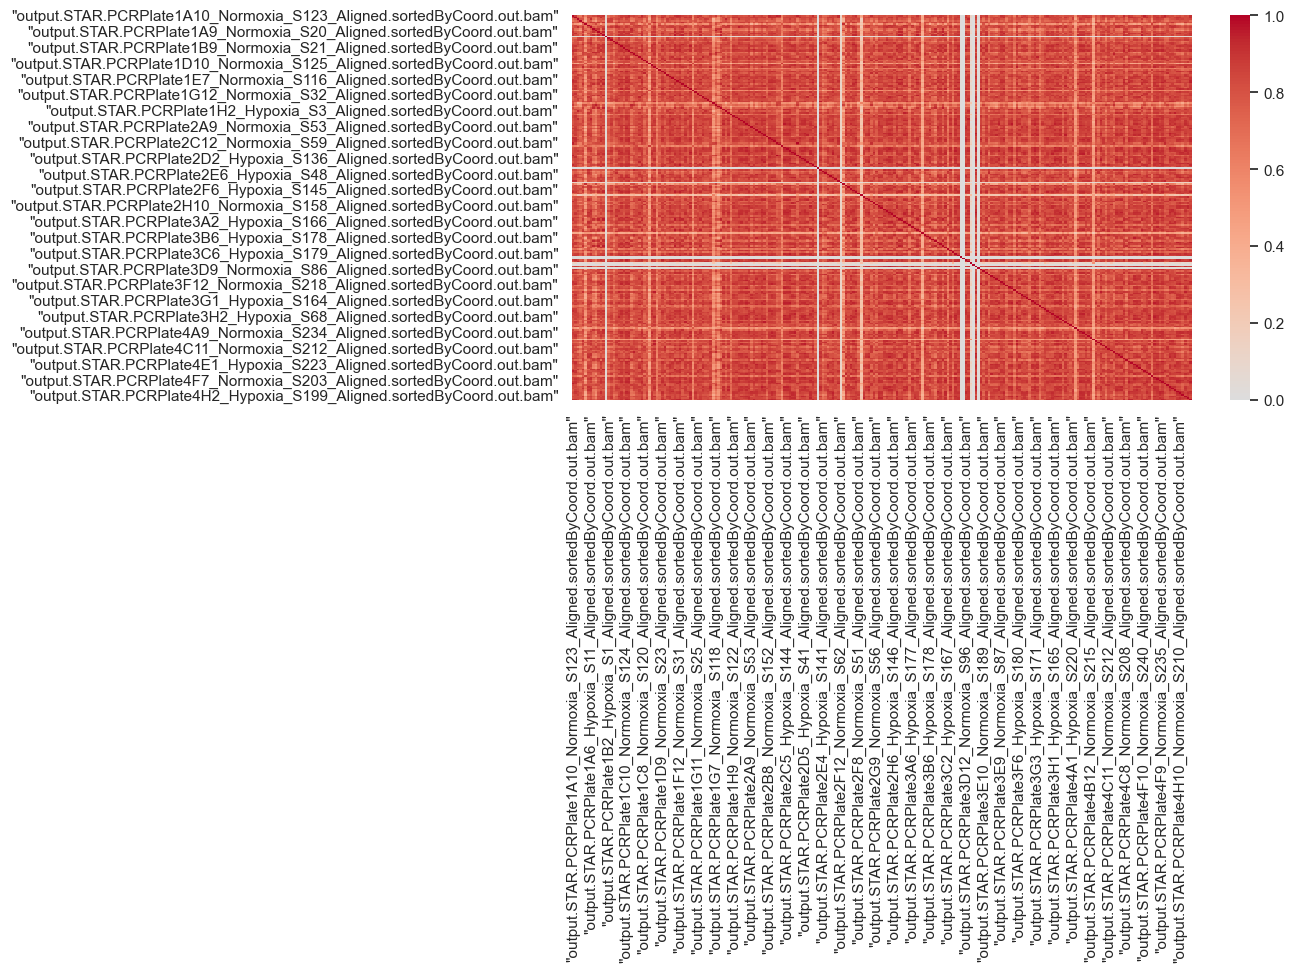

Number of cells included:  (243, 243)
Average correlation of expression profiles between cells:  0.4992953213403934
Min. correlation of expression profiles between cells:  -0.0014093573192132602


In [48]:
plt.figure(figsize=(10,5))

c_HCC= df_HCC_s_uf.corr()
midpoint = (c_HCC.values.max() - c_HCC.values.min()) /2 + c_HCC.values.min()
#sns.heatmap(c,cmap='coolwarm',annot=True, center=midpoint )
#plt.show()
sns.heatmap(c_HCC,cmap='coolwarm', center=0 )
plt.show()
print("Number of cells included: ", np.shape(c_HCC))
print("Average correlation of expression profiles between cells: ", midpoint)
print("Min. correlation of expression profiles between cells: ", c_HCC.values.min())

We could look at the distribution of the correlation between gene expression profiles using Histogram

                                                    "output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"  \
"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoo...                                           1.000000            
"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoo...                                           0.292568            
"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoo...                                           0.808329            
"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord...                                           0.697870            
"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord...                                           0.721242            
...                                                                                               ...            
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoo...                                           0.570941            
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoo...                                      

Text(0.5, 0, 'Correlation between cells expression profiles')

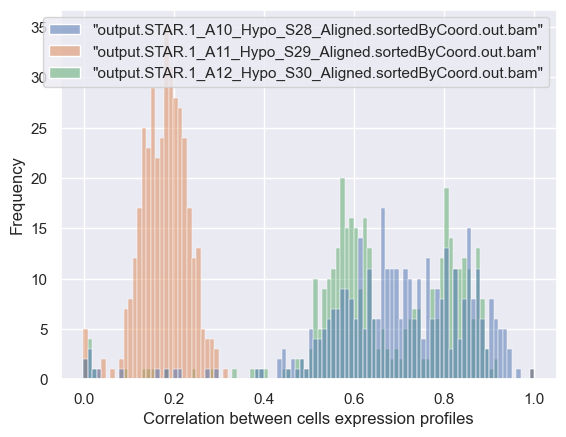

In [49]:
c_small = c_MCF.iloc[:,:3]
print(c_small)
sns.histplot(c_small,bins=100)
plt.ylabel('Frequency')
plt.xlabel('Correlation between cells expression profiles')

Text(0.5, 0, 'Correlation between cells expression profiles')

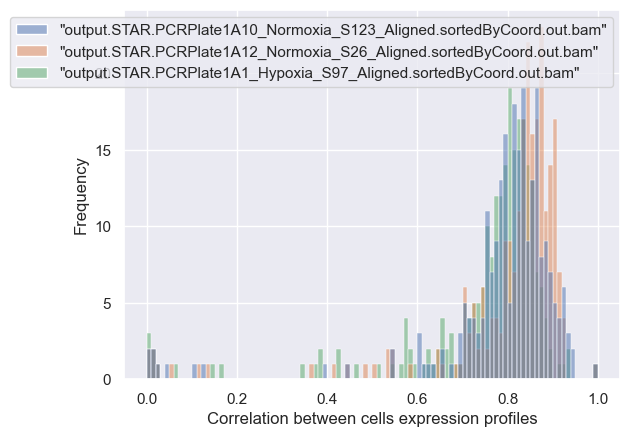

In [50]:
c_small = c_HCC.iloc[:,:3]
sns.histplot(c_small,bins=100)
plt.ylabel('Frequency')
plt.xlabel('Correlation between cells expression profiles')

We expect the correlation between the gene expression profiles of the the single cells to be fairly high.

Some genes will be characteristic of some cells. For example in our case we expect some genes to be expressed at high levels only in cells cultured in conditions of low oxygen (hypoxia), or viceversa. However, most of the low and/or high expressed genes will tend to be generally similar. Several genes will have a high expression across cells as they are house keeping genes needed for the basic functioning of the cell. Some genes will have low expression across cells as they are less or not essential for the normal functioning, so they will have low or no expression across cells and will only be expressed in specific circumstances.

Are there some cells which are not correlated with the others? 

Can you explore the distributions of gene expression for these cells and check why? Do they have more zero values than other cells? 

Or do they have higher values?

Next you could explore the features/genes. Are they correlated? Is this expected? Could this generate issues in the ML?

Repeat the steps above for all datasets, and discuss the findings.

## Model
